In [ ]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import torch

In [ ]:
NUM_EPOCHS=250
LEARNING_RATE=0.01
MOMENTUM=0.85
BATCH_SIZE=128
NUM_CLASSES=10

In [ ]:
labels=pd.read_csv('MNISTnumLabels5000_balanced.txt',names=["Labels"])
labels

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
4995,9
4996,9
4997,9
4998,9


In [ ]:
images=pd.read_csv('MNISTnumImages5000_balanced.txt',sep='\t',header=None)
images

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
images['Labels']=labels.values
images.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
4995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4999,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9


In [ ]:
images_label_0=images[images['Labels']==0]
images_label_1=images[images['Labels']==1]
images_label_2=images[images['Labels']==2]
images_label_3=images[images['Labels']==3]
images_label_4=images[images['Labels']==4]
images_label_5=images[images['Labels']==5]
images_label_6=images[images['Labels']==6]
images_label_7=images[images['Labels']==7]
images_label_8=images[images['Labels']==8]
images_label_9=images[images['Labels']==9]

In [ ]:
train_dataset=pd.concat([images_label_0.iloc[:400,:],images_label_1.iloc[:400,:],images_label_2.iloc[:400,:],images_label_3.iloc[:400,:],images_label_4.iloc[:400,:],images_label_5.iloc[:400,:],images_label_6.iloc[:400,:],images_label_7.iloc[:400,:],images_label_8.iloc[:400,:],images_label_9.iloc[:400,:]],axis=0)
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4896,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4897,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
4898,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9


In [ ]:
#shuffling the dataset
train_dataset=train_dataset.iloc[np.random.permutation(len(train_dataset))]
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
656,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
2341,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
2367,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
3148,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,6
662,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,2
4349,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,8
1512,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
2225,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4


In [ ]:
train_dataset=train_dataset.reset_index(drop=True)
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,2
3996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,8
3997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,3
3998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,4


In [ ]:
test_dataset=pd.concat([images_label_0.iloc[400:,:],images_label_1.iloc[400:,:],images_label_2.iloc[400:,:],images_label_3.iloc[400:,:],images_label_4.iloc[400:,:],images_label_5.iloc[400:,:],images_label_6.iloc[400:,:],images_label_7.iloc[400:,:],images_label_8.iloc[400:,:],images_label_9.iloc[400:,:]],axis=0)
test_dataset=test_dataset.reset_index(drop=True)
test_dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
996,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
997,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9
998,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,9


In [ ]:
NoOfHiddenLayers= int(input('Enter no of hidden layers '))
Hidden_layer_neurons = np.zeros((NoOfHiddenLayers+2))
Hidden_layer_neurons[0]=784
for i in range(1, NoOfHiddenLayers+1):
    Hidden_layer_neurons[i]=int(input('Enter no of Neurons '))
Hidden_layer_neurons[NoOfHiddenLayers+1]=10
Hidden_layer_neurons=list(Hidden_layer_neurons.astype(int))
print("Neural Network Skeleton :",Hidden_layer_neurons )

Enter no of hidden layers 1
Enter no of Neurons 170
Neural Network Skeleton : [784, 170, 10]


In [ ]:

Weights=[]

Weight_Prob1= np.load('AutoEncoderWeight.npy', allow_pickle=True)
Weights.append(Weight_Prob1[0])



for i in range(1, len(Hidden_layer_neurons)-1):
        temp_w = np.empty((Hidden_layer_neurons[i]+1,Hidden_layer_neurons[i+1]))
        for inp in range(0,Hidden_layer_neurons[i]+1):
            for out in range(Hidden_layer_neurons[i+1]):
                temp_w[inp,out] = random.uniform(-0.9,0.9)
        Weights.append(temp_w)

#Only training the neurons from hidden layer to the output layer
change_w = []
for i in range(1,len(Hidden_layer_neurons)-1):
    temp = np.empty((Hidden_layer_neurons[i]+1,Hidden_layer_neurons[i+1]))
    for j in range(0,Hidden_layer_neurons[i]+1):
        for k in range(Hidden_layer_neurons[i+1]):
            temp[j,k] = 0
    change_w.append(temp)
change_t = change_w

Weights[0].shape

(785, 170)

In [ ]:
Weights[0]

array([[-1.84446851, -0.10764013,  1.01961944, ...,  1.06656215,
         1.45067006,  0.18882521],
       [-0.00575397, -0.035892  ,  0.03024886, ..., -0.01844632,
         0.04048815, -0.03084522],
       [-0.04971286, -0.01981467,  0.02945279, ...,  0.03237264,
         0.0359789 , -0.04210908],
       ...,
       [ 0.00424703, -0.00651741,  0.03860532, ...,  0.04992811,
        -0.02489057, -0.01069887],
       [ 0.00335272,  0.025094  ,  0.04106612, ...,  0.01968811,
         0.0495462 ,  0.03409644],
       [ 0.03524409, -0.03411977,  0.0217291 , ...,  0.01730987,
        -0.00821658, -0.00733891]])

In [ ]:
Weights[1].shape

(171, 10)

In [ ]:

train_data=np.array(train_dataset)
test_data=np.array(test_dataset)


In [ ]:
x_train=np.array(train_dataset.drop("Labels",axis=1))
y_train=np.array(train_dataset.iloc[:,-1])
x_test=np.array(test_dataset.drop("Labels",axis=1))
y_test=np.array(test_dataset.iloc[:,-1])
def error_frac(x,y,w,test):

  error_frac=0
  a=0
  for j in range(0,len(w)):
    one = np.ones((len(x),1))
    x = np.append(one,x,axis=1)
    x = np.matmul(x,w[j])
    x = 1/(1+np.exp(-(x)))
    # print(x.shape)
    # print(1)
  for i in range(0,x.shape[0]):
    y_pred = np.argmax(x[i,:])
    # print(1)
    if y[i]-y_pred!=0:
      a+=1
  if test==False:
    # print(1)
    error_frac=(a/4000)
  else:
    # print(2)
    error_frac=(a/1000)      
  return error_frac 

In [ ]:
print("train errror fraction before training:",error_frac(x_train,y_train,Weights,False))
print("test errror fraction before training:",error_frac(x_test,y_test,Weights,True))
train_err_frac,test_err_frac=[],[]
train_err_frac.append(error_frac(x_train,y_train,Weights,False))
test_err_frac.append(error_frac(x_test,y_test,Weights,True))

train errror fraction before training: 0.87525
test errror fraction before training: 0.881


In [ ]:
training_data, train_class = train_data[:, :784], train_data[:, 784]
testing_data, test_class = test_data[:, :784], test_data[:, 784]

In [ ]:


W_Train=Weights
for e in range(0, NUM_EPOCHS):
    
    inp=training_data
    err=0
    for i in range(0, len(inp)):        
        output=[inp[i]]
        x = np.zeros(10,)
        y = int(train_class[i])
        #One-hot Encoding
        x[y] = 1
        y = x
        out1=inp[i]
        
        #Feed forward
        for j in range(0,len(W_Train)):
            out1 = np.hstack(([1],out1))
            Current_Layer = np.array(W_Train[j])
            out1 = np.matmul(out1,Current_Layer)
            out1 = 1/(1+np.exp(-(out1)))
            output.append(out1)
        y_hat=out1
        #Back propagation
        temp_out = np.multiply((y_hat),(1-y_hat))
        for j in range(0,len(out1)):
            if out1[j] < 0.25:
                out1[j] = 0
            elif out1[j] > 0.75:
                out1[j] = 1
            else:
                pass
        y_hat=out1
        error=np.array((y-y_hat))
        temp_out=np.multiply(temp_out, error)
        temp_dOut=temp_out
        temp_out=temp_out.reshape((1,10))
        temp_out=temp_out.tolist()
        
        for j in range(-1,-len(W_Train),-1):
            Current_Layer = W_Train[j]
            temp_dOut = np.matmul(Current_Layer[1:,:],temp_dOut)
            temp_dOut = np.multiply(temp_dOut,output[j-1])
            temp_dOut = np.multiply(temp_dOut,(1-output[j-1]))
            temp_out.append(temp_dOut)
        temp_out = temp_out[::-1]
        change = []
        
        for j in range(1,len(W_Train)):
            logits = output[j]
            logits = np.hstack(([1],logits))
            logits = np.reshape(logits,(len(logits),1))
            change_layer = np.reshape(temp_out[j],(1,len(temp_out[j])))
            change_w = np.matmul(logits,change_layer)
            change_w = np.multiply(LEARNING_RATE,change_w)
            change.append(change_w)
        
        for j in range(0,len(W_Train)-1):
            if i == 0:
                change_t[j] = change[j]
            else:
                change_t[j] = change[j] + np.multiply(MOMENTUM,change_t[j]) 
                
        for j in range(1,len(W_Train)):
            W_Train[j] = W_Train[j]+change_t[j-1]
        

        pred_y_hat = np.argmax(output[-1])
        act_y = np.argmax(y)
        if pred_y_hat == act_y:
            pass
        else:
            err +=1
            
    print('Epoch: %03d/%03d Train Error Fraction: %.4f' % (e+1, NUM_EPOCHS, error_frac(x_train,y_train,W_Train,False)))        
    # print("Running Epoch",e+1)
    if e%10==0:
      train_err=error_frac(x_train,y_train,W_Train,False)
      test_err=error_frac(x_test,y_test,W_Train,True)
      # print(test_err)
      train_err_frac.append(train_err)
      test_err_frac.append(test_err)
                

Epoch: 001/250 Train Error Fraction: 0.4785
Epoch: 002/250 Train Error Fraction: 0.3320
Epoch: 003/250 Train Error Fraction: 0.2467
Epoch: 004/250 Train Error Fraction: 0.2268
Epoch: 005/250 Train Error Fraction: 0.2090
Epoch: 006/250 Train Error Fraction: 0.1442
Epoch: 007/250 Train Error Fraction: 0.1190
Epoch: 008/250 Train Error Fraction: 0.1092
Epoch: 009/250 Train Error Fraction: 0.1060
Epoch: 010/250 Train Error Fraction: 0.1027
Epoch: 011/250 Train Error Fraction: 0.0990
Epoch: 012/250 Train Error Fraction: 0.0970
Epoch: 013/250 Train Error Fraction: 0.0940
Epoch: 014/250 Train Error Fraction: 0.0925
Epoch: 015/250 Train Error Fraction: 0.0912
Epoch: 016/250 Train Error Fraction: 0.0895
Epoch: 017/250 Train Error Fraction: 0.0880
Epoch: 018/250 Train Error Fraction: 0.0860
Epoch: 019/250 Train Error Fraction: 0.0840
Epoch: 020/250 Train Error Fraction: 0.0833
Epoch: 021/250 Train Error Fraction: 0.0838
Epoch: 022/250 Train Error Fraction: 0.0823
Epoch: 023/250 Train Error Fract

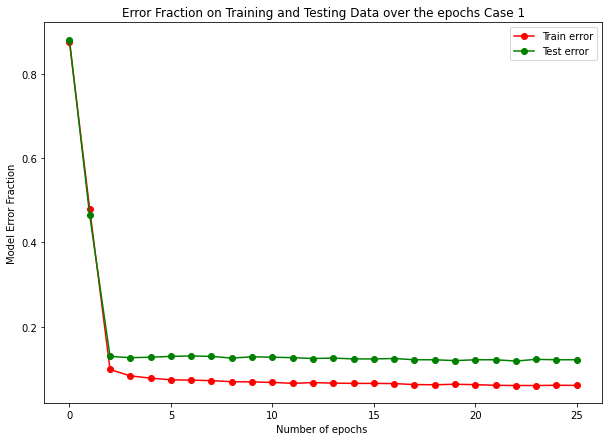

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(len(train_err_frac)),train_err_frac,'r-o',label="Train error")  
plt.plot(range(len(test_err_frac)),test_err_frac,'g-o',label="Test error")  
plt.title("Error Fraction on Training and Testing Data over the epochs Case 1")
plt.xlabel("Number of epochs ")
plt.ylabel("Model Error Fraction")
plt.legend()        
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def forward(x, w):
    list_o=[]
    for i in range(0,len(w)):
        ones1 = np.ones((len(x),1))
        x = np.append(ones1,x,axis=1)
        x = np.matmul(x,w[i])
        x = 1/(1+np.exp(-(x)))
        list_o.append(x)
    return x, list_o
def Pred_label(Yhat, Y):
    error_list=[]
    y_predLabels=[]
    error=0
    for i in range(0,len(Y)):
        y_pred = np.argmax(Yhat[i,:])
        y_predLabels.append(y_pred)
        
    return y_predLabels
def Find_error(Yhat, Y):
    error_list=[]
    y_predLabels=[]
    error=0
    for i in range(0,len(Y)):
        y_pred = np.argmax(Yhat[i,:])
        y_predLabels.append(y_pred)
        if Y[i].all() == y_pred:
            pass
        else:
            error += 1
    error_list.append(error/len(Y))
    
    return y_predLabels, error_list    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


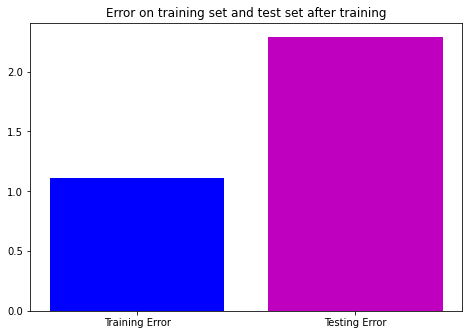

In [ ]:
#Errors on Training set and Test set after training
test_x=testing_data
test_y=test_class
train_x=training_data
train_y=train_class

test_pred, OutList_Test=forward(test_x, W_Train)
Y_PredLabelTest, Test_Error_aftrain=Find_error(test_pred,test_class)

train_pred, OutList_Train=forward(train_x, W_Train)
Y_PredTrain, Train_Error=Find_error(train_pred,train_x)

train_error = np.multiply((train_y-Y_PredTrain),(train_y-Y_PredTrain))
test_error = np.multiply((test_y-Y_PredLabelTest),(test_y-Y_PredLabelTest))
train_error_frac = train_error.sum()/4000
test_error_frac = test_error.sum()/1000

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Error on training set and test set after training")
ax.bar(['Training Error','Testing Error'],[train_error_frac,test_error_frac], color='bm')
plt.show()


In [ ]:
Label_train_error=[]
Label_test_error=[]
for i in range(0, 10):
    trainidx=i*400
    testidx=i*100
    err_train=train_error[trainidx : trainidx+400, ]
    err_test=test_error[testidx : testidx+100, ]
    err_train=err_train.sum()/400
    err_test=err_test.sum()/100
    Label_train_error=np.append(Label_train_error, [err_train], axis = 0).tolist()
    Label_test_error=np.append(Label_test_error, [err_test], axis = 0).tolist()

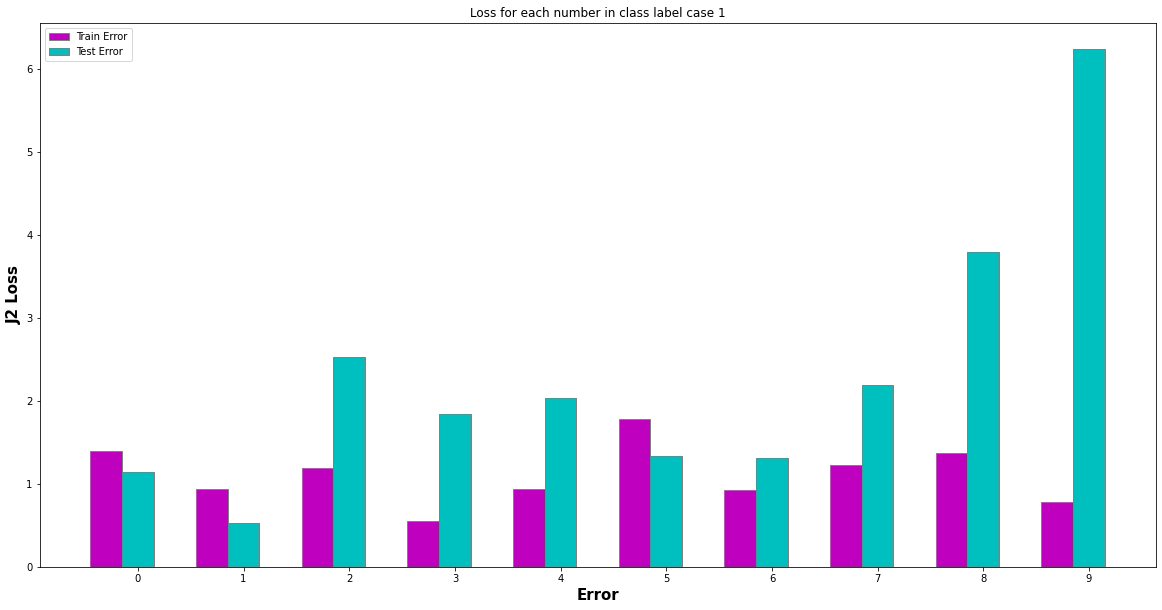

In [ ]:

fig = plt.subplots(figsize =(20,10))
bar1 = np.arange(10)
bar2 = [x + 0.3 for x in bar1]

plt.bar(bar1, Label_train_error, color ='m', width = 0.3,
        edgecolor ='grey', label ='Train Error')
plt.bar(bar2, Label_test_error, color ='c', width = 0.3,
        edgecolor ='grey', label ='Test Error')

plt.title('Loss for each number in class label case 1')
plt.xlabel('Error', fontweight ='bold', fontsize = 15)
plt.ylabel('J2 Loss', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.3 for r in range(10)],
        ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend()
plt.show()


<Figure size 720x720 with 0 Axes>

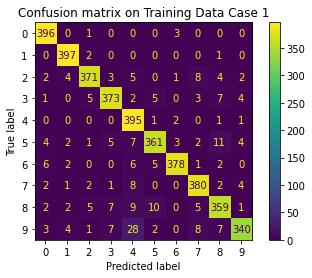

In [ ]:
#Confusion Matrix for training set
train_features = training_data
y = train_class
y = np.reshape(y,(4000))
y = y.tolist()
Y_PredLabels=[]

Ypred, list_o =forward(train_features, W_Train)
pred_label=Pred_label(Ypred, y)

y = pd.Series(y)
Y_PredLabels = pd.Series(pred_label)

plt.figure(figsize=(10,10))
cm = confusion_matrix(y, Y_PredLabels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion matrix on Training Data Case 1")
plt.show()

<Figure size 720x720 with 0 Axes>

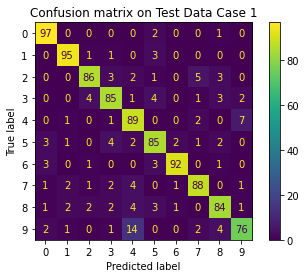

In [ ]:
#Confusion matrix for test data
test_features = testing_data
y = test_class
y = np.reshape(y,(1000))
y = y.tolist()
Y_PredLabels=[]

Ypred, list_o =forward(test_features, W_Train)
pred_label=Pred_label(Ypred, y)

y = pd.Series(y)
Y_PredLabels = pd.Series(pred_label)

plt.figure(figsize=(10,10))
cm = confusion_matrix(y, Y_PredLabels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion matrix on Test Data Case 1")
plt.show()
